# Submission - Inquisitive_Turtles

In [143]:
import pandas as pd

In [144]:
train_df = pd.read_csv('/kaggle/input/data-insurance/train.csv')
test_df = pd.read_csv('/kaggle/input/test-data/test (1).csv')

In [145]:
print('\ntrain df stats')
print(train_df.describe())
print('\ntest df stats')
print(test_df.describe())


train df stats
                 id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.000000  0.00000

In [146]:
def check_missing(df):
    missing_values = df.isnull().sum()
    cols_with_missing = missing_values[missing_values > 0]
    print(cols_with_missing)
    print('\n')
print('\nchecking missing values for train df')
check_missing(train_df)
print('\nchecking missing values for test df')
check_missing(test_df)


checking missing values for train df
Age                      18705
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Occupation              358075
Health Score             74076
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Customer Feedback        77824
dtype: int64



checking missing values for test df
Age                      12489
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Occupation              239125
Health Score             49449
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Customer Feedback        52276
dtype: int64




In [150]:
train_df = train_df.dropna(subset = 'Premium Amount')
test_df_cleaned = test_df

In [151]:
def check_outliers(df):
    Q1 = df['Previous Claims'].quantile(0.25)
    Q3 = df['Previous Claims'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_cleaned = df[(train_df['Previous Claims'] >= lower_bound) & (df['Previous Claims'] <= upper_bound)]
    df_outliers = df[(train_df['Previous Claims'] < lower_bound) | (df['Previous Claims'] > upper_bound)]

    return df_cleaned,df_outliers

train_df_cleaned, train_df_outliers = check_outliers(train_df)
print('number of outliers in train df: ',train_df_outliers['Previous Claims'].count())
print("Original DataFrame with outliers in train df:",train_df['Previous Claims'].count())
print("DataFrame after removing outliers in train df:",train_df_cleaned['Previous Claims'].count())


number of outliers in train df:  369
Original DataFrame with outliers in train df: 835971
DataFrame after removing outliers in train df: 835602


In [152]:
print('\n cleaned train df stats')
print(train_df_cleaned.describe())
print('\n cleaned test df stats')
print(test_df_cleaned.describe())


 cleaned train df stats
                 id            Age  Annual Income  Number of Dependents  \
count  8.356020e+05  822647.000000  803658.000000         758510.000000   
mean   5.999803e+05      41.133822   33043.037242              2.013376   
std    3.463694e+05      13.537680   32655.711592              1.417262   
min    0.000000e+00      18.000000       1.000000              0.000000   
25%    2.999072e+05      30.000000    7765.000000              1.000000   
50%    5.999345e+05      41.000000   23962.000000              2.000000   
75%    8.997585e+05      53.000000   44934.000000              3.000000   
max    1.199999e+06      64.000000  149997.000000              4.000000   

        Health Score  Previous Claims    Vehicle Age   Credit Score  \
count  784628.000000    835602.000000  835597.000000  738880.000000   
mean       25.632917         1.000390       9.559620     594.081544   
std        12.225718         0.976897       5.776622     149.648098   
min         2.0

In [153]:
mean_imputation_cols = ['Age','Number of Dependents','Credit Score','Credit Score']

In [154]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
train_df_cleaned[mean_imputation_cols]= imputer.fit_transform(train_df_cleaned[mean_imputation_cols])
test_df_cleaned[mean_imputation_cols]= imputer.transform(test_df_cleaned[mean_imputation_cols])
print(train_df_cleaned.head(5))
print(test_df_cleaned.head(5))


   id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Pol

<ipython-input-154-28baafd5655f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned[mean_imputation_cols]= imputer.fit_transform(train_df_cleaned[mean_imputation_cols])


In [155]:
print('\nchecking missing values for cleaned train df')
check_missing(train_df_cleaned)
print('\nchecking missing values for cleaned test df')
check_missing(test_df_cleaned)


checking missing values for cleaned train df
Annual Income          31944
Marital Status         13213
Occupation            249116
Health Score           50974
Vehicle Age                5
Insurance Duration         1
Customer Feedback      54935
dtype: int64



checking missing values for cleaned test df
Annual Income          29860
Marital Status         12336
Occupation            239125
Health Score           49449
Previous Claims       242802
Vehicle Age                3
Insurance Duration         2
Customer Feedback      52276
dtype: int64




In [156]:
mode_imputation_cols=['Annual Income','Health Score','Marital Status','Occupation', 'Customer Feedback']

In [157]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
train_df_cleaned[mode_imputation_cols]= imputer.fit_transform(train_df_cleaned[mode_imputation_cols])
test_df_cleaned[mode_imputation_cols]= imputer.transform(test_df_cleaned[mode_imputation_cols])
print(train_df_cleaned.head(5))
print(test_df_cleaned.head(5))


<ipython-input-157-df35e6945d4f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_cleaned[mode_imputation_cols]= imputer.fit_transform(train_df_cleaned[mode_imputation_cols])


   id   Age  Gender Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female       10049.0        Married                   1.0   
1   1  39.0  Female       31678.0       Divorced                   3.0   
2   2  23.0    Male       25602.0       Divorced                   3.0   
3   3  21.0    Male      141855.0        Married                   2.0   
4   4  21.0    Male       39651.0         Single                   1.0   

  Education Level     Occupation Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed    22.598761     Urban  ...             2.0   
1        Master's  Self-Employed    15.569731     Rural  ...             1.0   
2     High School  Self-Employed    47.177549  Suburban  ...             1.0   
3      Bachelor's  Self-Employed    10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed    20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  Insurance Duration           Policy Start Da

In [158]:
print('\nchecking missing values for cleaned train df')
check_missing(train_df_cleaned)
print('\nchecking missing values for cleaned test df')
check_missing(test_df_cleaned)


checking missing values for cleaned train df
Vehicle Age           5
Insurance Duration    1
dtype: int64



checking missing values for cleaned test df
Previous Claims       242802
Vehicle Age                3
Insurance Duration         2
dtype: int64




In [159]:
train_df_cleaned = train_df_cleaned.dropna(subset=['Vehicle Age','Insurance Duration'])

In [160]:
print('\nchecking missing values for cleaned train df')
check_missing(train_df_cleaned)
print('\nchecking missing values for cleaned test df')
check_missing(test_df_cleaned)


checking missing values for cleaned train df
Series([], dtype: int64)



checking missing values for cleaned test df
Previous Claims       242802
Vehicle Age                3
Insurance Duration         2
dtype: int64




In [162]:
test_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
count,8.000000e+05,800000.000000,800000.000000,557198.000000,799997.000000,800000.000000,799998.000000
mean,1.600000e+06,41.136399,2.009707,1.004873,9.571891,593.039273,5.018949
std,2.309403e+05,13.431742,1.349006,0.982803,5.772200,141.276363,2.593759
min,1.200000e+06,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000
25%,1.400000e+06,30.000000,1.000000,0.000000,5.000000,483.000000,3.000000
50%,1.600000e+06,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000
75%,1.799999e+06,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000
max,1.999999e+06,64.000000,4.000000,9.000000,19.000000,849.000000,9.000000


In [163]:
train_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,8.355960e+05,835596.000000,835596.000000,835596.000000,835596.000000,835596.000000,835596.000000,835596.000000
mean,5.999812e+05,41.133787,2.013375,1.000388,9.559610,594.081922,5.014704,1113.586324
std,3.463690e+05,13.432306,1.350305,0.976896,5.776618,140.720824,2.594814,870.258271
min,0.000000e+00,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000,20.000000
25%,2.999078e+05,30.000000,1.000000,0.000000,5.000000,486.000000,3.000000,519.000000
50%,5.999370e+05,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000,882.000000
75%,8.997592e+05,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000,1523.000000
max,1.199999e+06,64.000000,4.000000,5.000000,19.000000,849.000000,9.000000,4999.000000


In [164]:
train_df_cleaned.dtypes

id                        int64
Age                     float64
Gender                   object
Annual Income            object
Marital Status           object
Number of Dependents    float64
Education Level          object
Occupation               object
Health Score             object
Location                 object
Policy Type              object
Previous Claims         float64
Vehicle Age             float64
Credit Score            float64
Insurance Duration      float64
Policy Start Date        object
Customer Feedback        object
Smoking Status           object
Exercise Frequency       object
Property Type            object
Premium Amount          float64
dtype: object

In [165]:
from sklearn.preprocessing import OneHotEncoder
encoding_cols=['Customer Feedback','Occupation','Education Level','Marital Status',
               'Property Type','Exercise Frequency','Smoking Status','Policy Type','Gender','Location']

encoder = OneHotEncoder(sparse=False)

train_encoded_array = encoder.fit_transform(train_df_cleaned[encoding_cols])
test_encoded_array = encoder.transform(test_df_cleaned[encoding_cols])

train_encoded_df = pd.DataFrame(train_encoded_array, columns=encoder.get_feature_names_out(encoding_cols))
test_encoded_df = pd.DataFrame(test_encoded_array, columns=encoder.get_feature_names_out(encoding_cols))

train_df_cleaned = pd.concat([train_df_cleaned.drop(columns=encoding_cols), train_encoded_df], axis=1)
test_df_cleaned = pd.concat([test_df_cleaned.drop(columns=encoding_cols), test_encoded_df], axis=1)

print(train_df_cleaned.columns)
print(test_df_cleaned.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Policy Start Date', 'Premium Amount', 'Customer Feedback_Average',
       'Customer Feedback_Good', 'Customer Feedback_Poor',
       'Occupation_Employed', 'Occupation_Self-Employed',
       'Occupation_Unemployed', 'Education Level_Bachelor's',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_PhD', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Property Type_Apartment', 'Property Type_Condo', 'Property Type_House',
       'Exercise Frequency_Daily', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
       'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female',
       'Gender_Male', 'Location_Rural', 'Location_Su

In [166]:
train_df_cleaned.head(5)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
0,0.0,19.0,10049.0,1.0,22.598761,2.0,17.0,372.000000,5.0,2023-12-23 15:21:39.134960,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,39.0,31678.0,3.0,15.569731,1.0,12.0,694.000000,2.0,2023-06-12 15:21:39.111551,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,2.0,23.0,25602.0,3.0,47.177549,1.0,14.0,594.081544,3.0,2023-09-30 15:21:39.221386,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,21.0,141855.0,2.0,10.938144,1.0,0.0,367.000000,1.0,2024-06-12 15:21:39.226954,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,4.0,21.0,39651.0,1.0,20.376094,0.0,8.0,598.000000,4.0,2021-12-01 15:21:39.252145,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [167]:
test_df_cleaned.head(5)

,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
0,1200000,28.0,2310.0,4.0,7.657981,NaN,19.0,594.081544,1.0,2023-06-04 15:21:39.245086,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1200001,31.0,126031.0,2.0,13.381379,NaN,14.0,372.000000,8.0,2024-04-22 15:21:39.224915,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,1200002,47.0,17092.0,0.0,24.354527,NaN,16.0,819.000000,9.0,2023-04-05 15:21:39.134960,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1200003,28.0,30424.0,3.0,5.136225,1.0,3.0,770.000000,5.0,2023-10-25 15:21:39.134960,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1200004,24.0,10863.0,2.0,11.844155,NaN,14.0,755.000000,7.0,2021-11-26 15:21:39.259788,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [168]:
train_df_cleaned.dtypes

id                             float64
Age                            float64
Annual Income                   object
Number of Dependents           float64
Health Score                    object
Previous Claims                float64
Vehicle Age                    float64
Credit Score                   float64
Insurance Duration             float64
Policy Start Date               object
Premium Amount                 float64
Customer Feedback_Average      float64
Customer Feedback_Good         float64
Customer Feedback_Poor         float64
Occupation_Employed            float64
Occupation_Self-Employed       float64
Occupation_Unemployed          float64
Education Level_Bachelor's     float64
Education Level_High School    float64
Education Level_Master's       float64
Education Level_PhD            float64
Marital Status_Divorced        float64
Marital Status_Married         float64
Marital Status_Single          float64
Property Type_Apartment        float64
Property Type_Condo      

In [169]:
train_df_cleaned = train_df_cleaned.dropna()

In [170]:
train_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,Customer Feedback_Average,Customer Feedback_Good,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,...,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000,581884.000000
mean,417834.454536,41.141527,2.013831,0.999955,9.561010,594.010609,5.016130,1113.471011,0.380533,0.307640,...,0.498546,0.501454,0.333551,0.332193,0.334256,0.497637,0.502363,0.333426,0.334666,0.331908
std,241212.137558,13.433054,1.350569,0.976736,5.775115,140.753756,2.594489,870.936558,0.485518,0.461517,...,0.499998,0.499998,0.471482,0.471000,0.471730,0.499995,0.499995,0.471438,0.471874,0.470899
min,0.000000,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000,20.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,208933.750000,30.000000,1.000000,0.000000,5.000000,486.000000,3.000000,518.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,417795.500000,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000,882.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,626883.500000,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000,1523.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,835595.000000,64.000000,4.000000,5.000000,19.000000,849.000000,9.000000,4997.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
test_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback_Average,Customer Feedback_Good,Customer Feedback_Poor,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,8.000000e+05,800000.000000,800000.000000,557198.000000,799997.000000,800000.000000,799998.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,1.600000e+06,41.136399,2.009707,1.004873,9.571891,593.039273,5.018949,0.379366,0.307591,0.313043,...,0.497676,0.502324,0.332686,0.332778,0.334536,0.498639,0.501361,0.333900,0.333987,0.332112
std,2.309403e+05,13.431742,1.349006,0.982803,5.772200,141.276363,2.593759,0.485230,0.461497,0.463732,...,0.499995,0.499995,0.471176,0.471208,0.471828,0.499998,0.499998,0.471605,0.471636,0.470971
min,1.200000e+06,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+06,30.000000,1.000000,0.000000,5.000000,483.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.600000e+06,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.799999e+06,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.999999e+06,64.000000,4.000000,9.000000,19.000000,849.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [172]:
test_df_cleaned = test_df_cleaned

In [173]:
test_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback_Average,Customer Feedback_Good,Customer Feedback_Poor,...,Smoking Status_No,Smoking Status_Yes,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban
count,8.000000e+05,800000.000000,800000.000000,557198.000000,799997.000000,800000.000000,799998.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,1.600000e+06,41.136399,2.009707,1.004873,9.571891,593.039273,5.018949,0.379366,0.307591,0.313043,...,0.497676,0.502324,0.332686,0.332778,0.334536,0.498639,0.501361,0.333900,0.333987,0.332112
std,2.309403e+05,13.431742,1.349006,0.982803,5.772200,141.276363,2.593759,0.485230,0.461497,0.463732,...,0.499995,0.499995,0.471176,0.471208,0.471828,0.499998,0.499998,0.471605,0.471636,0.470971
min,1.200000e+06,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.400000e+06,30.000000,1.000000,0.000000,5.000000,483.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.600000e+06,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.799999e+06,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.999999e+06,64.000000,4.000000,9.000000,19.000000,849.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
train_df_cleaned['Number of Dependents'] = train_df_cleaned['Number of Dependents'].astype('int32')
test_df_cleaned['Number of Dependents'] = test_df_cleaned['Number of Dependents'].astype('int32')

In [175]:
train_df_cleaned['Policy Start Date'] = train_df_cleaned['Policy Start Date'].astype('datetime64[ns]')
test_df_cleaned['Policy Start Date'] = test_df_cleaned['Policy Start Date'].astype('datetime64[ns]')

In [176]:
train_df_cleaned['Annual Income'] = train_df_cleaned['Annual Income'].astype('float64')
test_df_cleaned['Annual Income'] = test_df_cleaned['Annual Income'].astype('float64')

In [177]:
train_df_cleaned['Health Score'] = train_df_cleaned['Health Score'].astype('float64')
test_df_cleaned['Health Score'] = test_df_cleaned['Health Score'].astype('float64')

In [178]:
train_df_cleaned.dtypes

id                                    float64
Age                                   float64
Annual Income                         float64
Number of Dependents                    int32
Health Score                          float64
Previous Claims                       float64
Vehicle Age                           float64
Credit Score                          float64
Insurance Duration                    float64
Policy Start Date              datetime64[ns]
Premium Amount                        float64
Customer Feedback_Average             float64
Customer Feedback_Good                float64
Customer Feedback_Poor                float64
Occupation_Employed                   float64
Occupation_Self-Employed              float64
Occupation_Unemployed                 float64
Education Level_Bachelor's            float64
Education Level_High School           float64
Education Level_Master's              float64
Education Level_PhD                   float64
Marital Status_Divorced           

In [179]:
test_df_cleaned.dtypes

id                                      int64
Age                                   float64
Annual Income                         float64
Number of Dependents                    int32
Health Score                          float64
Previous Claims                       float64
Vehicle Age                           float64
Credit Score                          float64
Insurance Duration                    float64
Policy Start Date              datetime64[ns]
Customer Feedback_Average             float64
Customer Feedback_Good                float64
Customer Feedback_Poor                float64
Occupation_Employed                   float64
Occupation_Self-Employed              float64
Occupation_Unemployed                 float64
Education Level_Bachelor's            float64
Education Level_High School           float64
Education Level_Master's              float64
Education Level_PhD                   float64
Marital Status_Divorced               float64
Marital Status_Married            

In [180]:
train_df_cleaned = train_df_cleaned.drop(columns=['Policy Start Date'])
test_df_cleaned = test_df_cleaned.drop(columns=['Policy Start Date'])

In [181]:
train_df_cleaned.columns

Index(['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score',
       'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration',
       'Premium Amount', 'Customer Feedback_Average', 'Customer Feedback_Good',
       'Customer Feedback_Poor', 'Occupation_Employed',
       'Occupation_Self-Employed', 'Occupation_Unemployed',
       'Education Level_Bachelor's', 'Education Level_High School',
       'Education Level_Master's', 'Education Level_PhD',
       'Marital Status_Divorced', 'Marital Status_Married',
       'Marital Status_Single', 'Property Type_Apartment',
       'Property Type_Condo', 'Property Type_House',
       'Exercise Frequency_Daily', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
       'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female',
       'Gender_Male', 'Location_Rural', 'Location_Suburban', 'Location_Ur

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import yeojohnson
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

skewed_cols=['Annual Income','Health Score','Premium Amount']
X = train_df_cleaned.drop(columns=['Premium Amount'])  # Replace 'Premium Amount' with actual target column
y = train_df_cleaned['Premium Amount']

# Identify skewed columns
skewed_cols = ['Annual Income', 'Health Score', 'Premium Amount']

# Initialize models to evaluate
models = {
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor(learning_rate=0.1, depth=6, iterations=100, verbose=0)
}

# Initialize k-fold
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Placeholder for results
results = {}

# Perform cross-validation (before transformations)
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(mean_squared_error, greater_is_better=False), n_jobs=-1)
    results[name] = scores
    print(f"{name}: Mean MSE = {-np.mean(scores):.4f}, Std = {np.std(scores):.4f}")
    print(scores)

Gradient Boosting Regressor: Mean MSE = 740831.7270, Std = 2394.0546
[-741385.91727389 -737662.0723325  -743447.19151988]
XGBoost: Mean MSE = 736393.2658, Std = 2778.8302
[-737508.39606781 -732572.23485675 -739099.16654993]
LightGBM: Mean MSE = 731184.8683, Std = 2648.5548
[-732144.60724928 -727569.48606391 -733840.51145145]
CatBoost: Mean MSE = 735313.4416, Std = 2582.9594
[-735840.01892188 -731919.72860973 -738180.57721098]


In [183]:
def apply_yeojohnson_transformations(df, skewed_cols, lambda_dict=None, calculate_lambda=True):
    if lambda_dict is None:
        lambda_dict = {}

    for col in skewed_cols:
        if col in df.columns:
            # Check initial skewness
            print(f"Initial Skewness of {col}: {df[col].skew()}")

            # Apply Yeo-Johnson transformation
            if calculate_lambda:
                df[col], yeojohnson_lambda = yeojohnson(df[col])
                lambda_dict[col] = yeojohnson_lambda
            else:
                df[col] = yeojohnson(df[col], lmbda=lambda_dict[col])

            print(f"After Yeo-Johnson transformation for {col}: Skewness = {df[col].skew()}")

    return df, lambda_dict

# Function to perform Yeo-Johnson inverse transformations
def yeojohnson_inverse(y_transformed, lmbda):
    y_original = np.zeros_like(y_transformed)
    
    # For y >= 0
    pos_idx = y_transformed >= 0
    if lmbda == 0:
        y_original[pos_idx] = np.exp(y_transformed[pos_idx]) - 1
    else:
        y_original[pos_idx] = (y_transformed[pos_idx] * lmbda + 1)**(1 / lmbda) - 1
    
    # For y < 0
    neg_idx = ~pos_idx
    if lmbda == 2:
        y_original[neg_idx] = 1 - np.exp(-y_transformed[neg_idx])
    else:
        y_original[neg_idx] = 1 - ((-y_transformed[neg_idx] * (2 - lmbda) + 1)**(1 / (2 - lmbda)))
    
    return y_original

# Inverse-transform the predictions
def inverse_yeojohnson_transformations(predictions, skewed_cols, lambda_dict):
    for col in skewed_cols:
        if col in lambda_dict:
            predictions[col] = yeojohnson_inverse(predictions[col].values, lambda_dict[col])
    return predictions

def plot_hist(df, col):
    plt.hist(df[col], bins=10, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [184]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lambda_dict = {}
print('Applying Yeo-Johnson transformations to train set:')
X_train_transformed, lambda_dict = apply_yeojohnson_transformations(X_train.copy(), skewed_cols, lambda_dict=lambda_dict, calculate_lambda=True)
print('Applying Yeo-Johnson transformations to validation set:')
X_val_transformed, _ = apply_yeojohnson_transformations(X_val.copy(), skewed_cols, lambda_dict=lambda_dict, calculate_lambda=False)

# Train the best model
best_model = lgb.LGBMRegressor(random_state=42)
best_model.fit(X_train_transformed, y_train)

# Evaluate on validation set
y_val_pred = best_model.predict(X_val_transformed)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE for the best model: {val_mse:.4f}")

Applying Yeo-Johnson transformations to train set:
Initial Skewness of Annual Income: 1.4994404226173101
After Yeo-Johnson transformation for Annual Income: Skewness = -0.07271715132009801
Initial Skewness of Health Score: 0.2836005509275364
After Yeo-Johnson transformation for Health Score: Skewness = -0.07565962222259648
Applying Yeo-Johnson transformations to validation set:
Initial Skewness of Annual Income: 1.4895593639788574
After Yeo-Johnson transformation for Annual Income: Skewness = -0.08131959297353099
Initial Skewness of Health Score: 0.2747615928587662
After Yeo-Johnson transformation for Health Score: Skewness = -0.084181476386961
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightG

In [185]:
# Cross-validation on transformed features
transformed_results = {}

print("\nPerforming cross-validation on transformed features:")
for name, model in models.items():
    scores = cross_val_score(
        model,
        X_train_transformed,  # Use transformed features
        y_train,
        cv=kf,
        scoring=make_scorer(mean_squared_error, greater_is_better=False)
    )
    transformed_results[name] = scores
    print(f"{name}: Mean MSE = {-np.mean(scores):.4f}, Std = {np.std(scores):.4f}")

# Compare with the earlier cross-validation results before transformations
print("\nComparison of Cross-Validation Results:")
print(f"{'Model':<20}{'Before Transformations':<30}{'After Transformations':<30}")
for name in models.keys():
    before_mean_mse = -np.mean(results[name])
    after_mean_mse = -np.mean(transformed_results[name])
    print(f"{name:<20}{before_mean_mse:<30.4f}{after_mean_mse:<30.4f}")



Performing cross-validation on transformed features:
Gradient Boosting Regressor: Mean MSE = 739374.5304, Std = 1253.5597
XGBoost: Mean MSE = 736693.4924, Std = 1242.7047
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 310338, number of used features: 39
[LightGBM] [Info] Start training from score 1111.343600
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 116

In [186]:
train_df_cleaned['Annual Income'].describe()

count    581884.000000
mean      32418.311999
std       32210.845765
min           2.000000
25%        8072.000000
50%       22162.000000
75%       44296.250000
max      149997.000000
Name: Annual Income, dtype: float64

Applying transformations to train set:
Initial Skewness of Annual Income: 1.4974531154148087
After transformations for Annual Income:
Annual Income_sqrt: Skewness = 0.5172995552300926


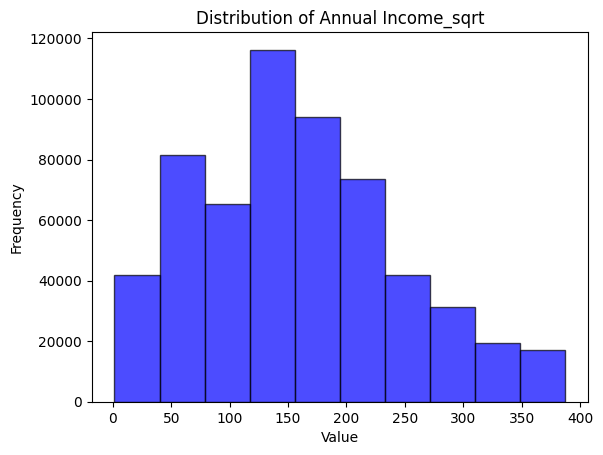

Annual Income_cbrt: Skewness = 0.11207061796575012


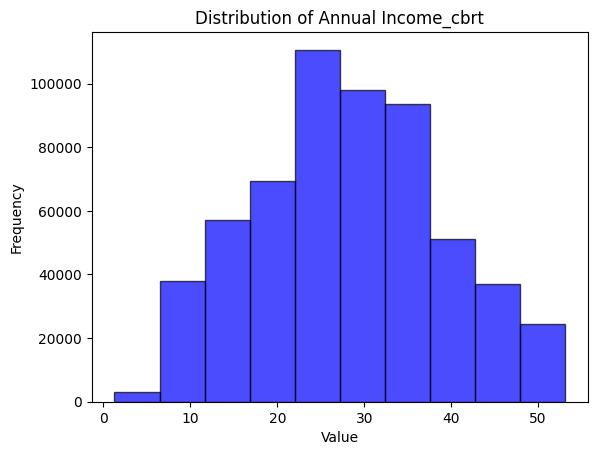

Annual Income_log: Skewness = -0.9840727236322069


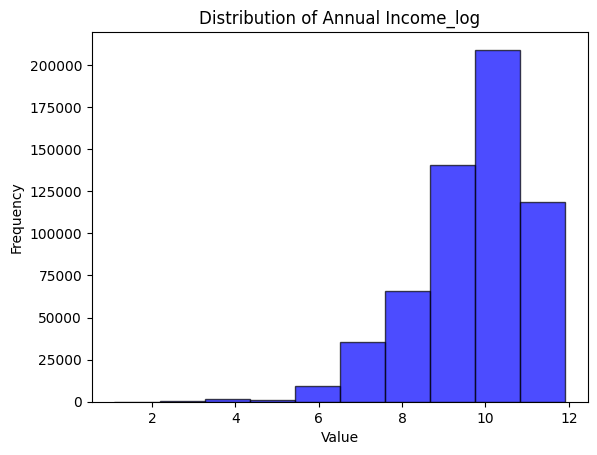

Annual Income_boxcox: Skewness = -0.07293450748039683


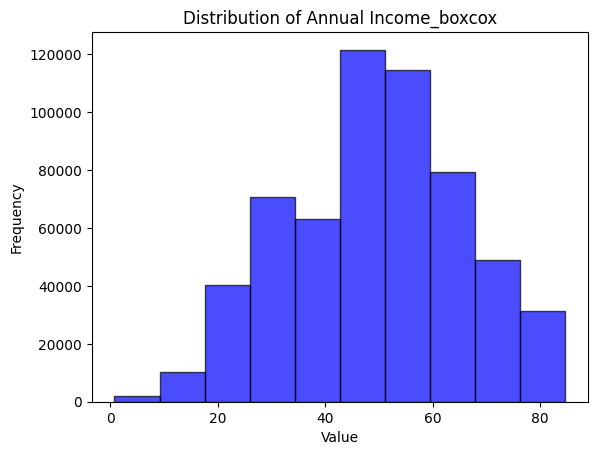

Annual Income_yeojohnson: Skewness = -0.07295342532202617


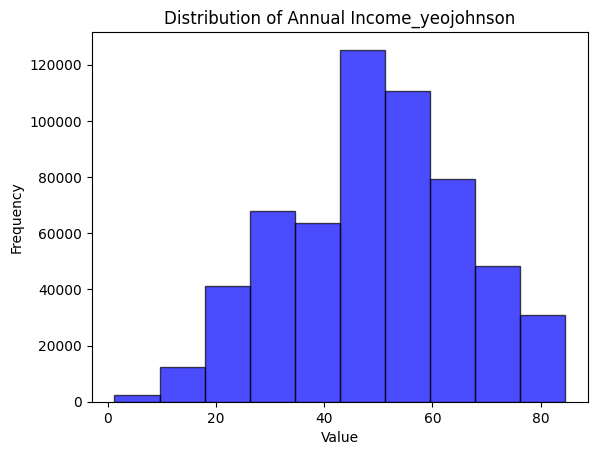

Initial Skewness of Health Score: 0.28183260793850523
After transformations for Health Score:
Health Score_sqrt: Skewness = -0.23373944058237398


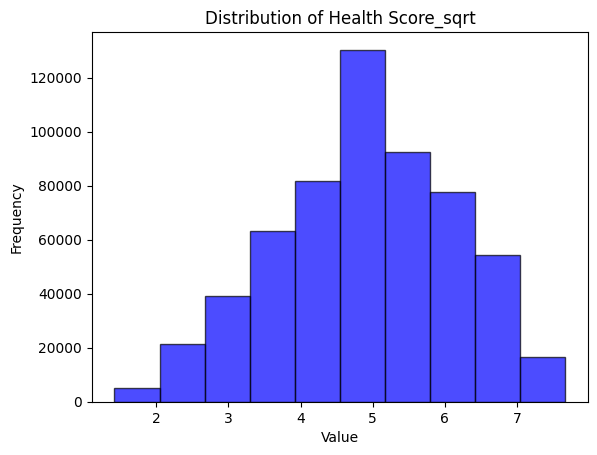

Health Score_cbrt: Skewness = -0.43305317850674063


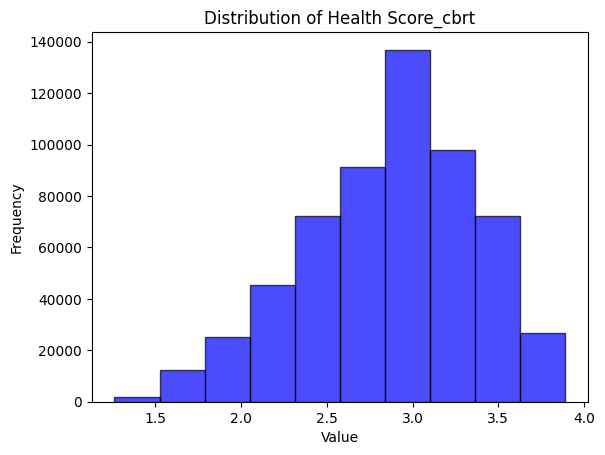

Health Score_log: Skewness = -0.7920431273101834


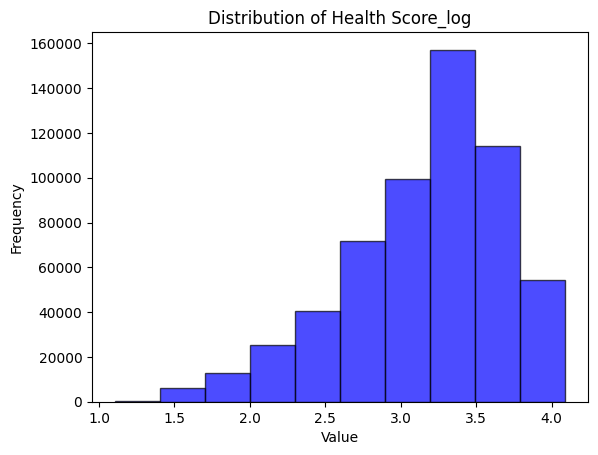

Health Score_boxcox: Skewness = -0.08259865769234025


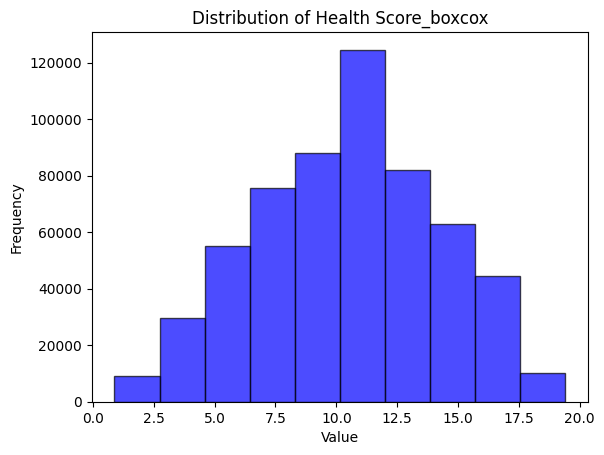

Health Score_yeojohnson: Skewness = -0.07602169681640947


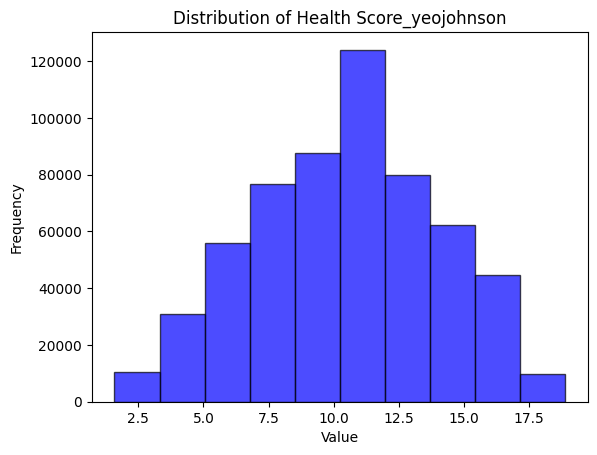

Initial Skewness of Premium Amount: 1.2247314242869725
After transformations for Premium Amount:
Premium Amount_sqrt: Skewness = 0.1881674064477062


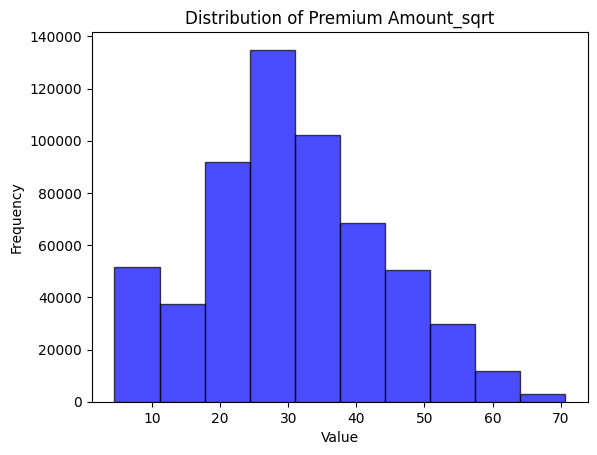

Premium Amount_cbrt: Skewness = -0.2500281167059548


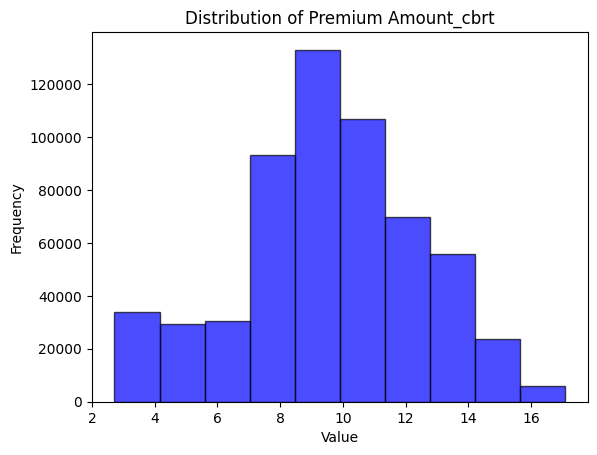

Premium Amount_log: Skewness = -1.2717474641398203


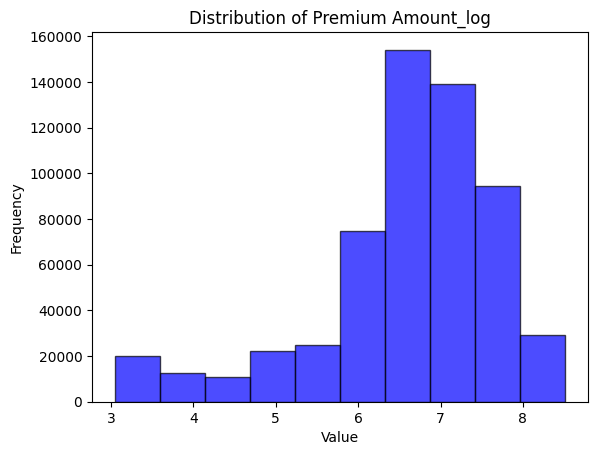

Premium Amount_boxcox: Skewness = -0.06001121508031605


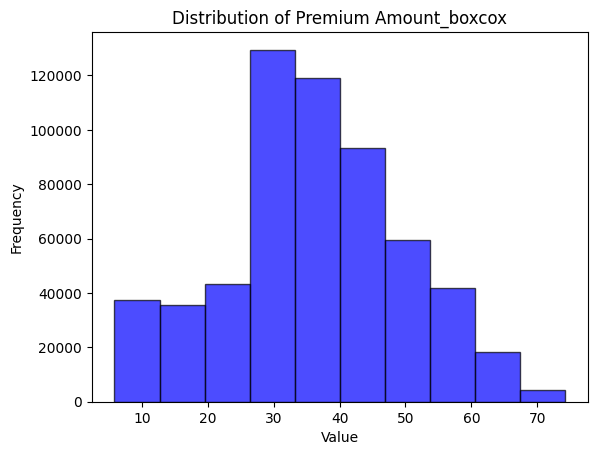

Premium Amount_yeojohnson: Skewness = -0.05939287054309065


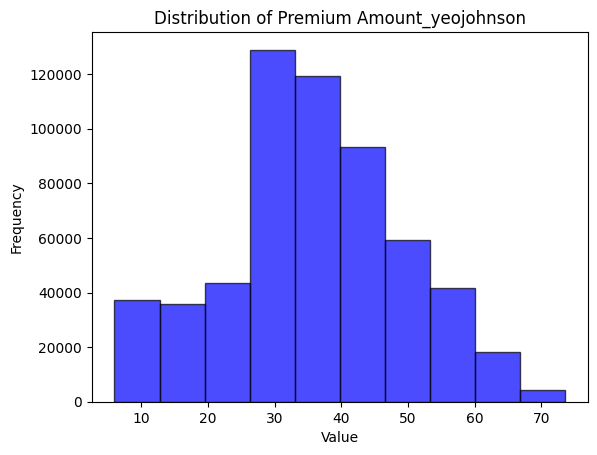

Applying transformations to test set:
Initial Skewness of Annual Income: 1.5238902953582003
After transformations for Annual Income:
Annual Income_sqrt: Skewness = 0.5245052507568767


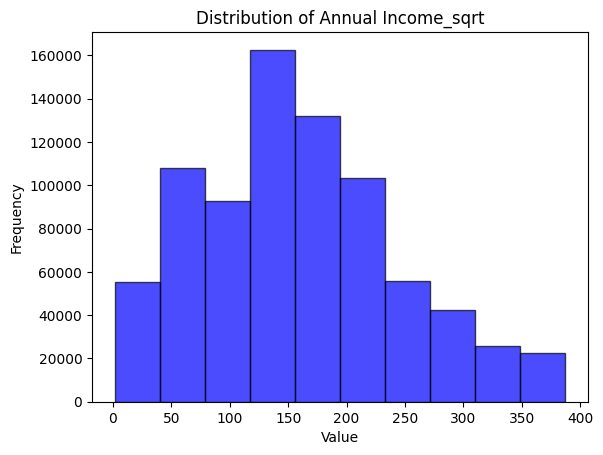

Annual Income_cbrt: Skewness = 0.11099977432540588


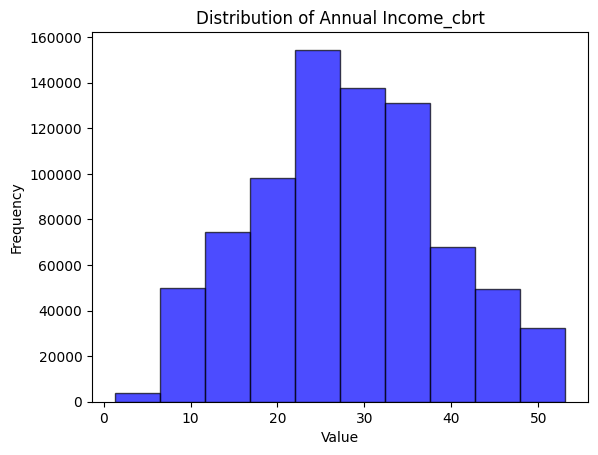

Annual Income_log: Skewness = -1.0126890044631534


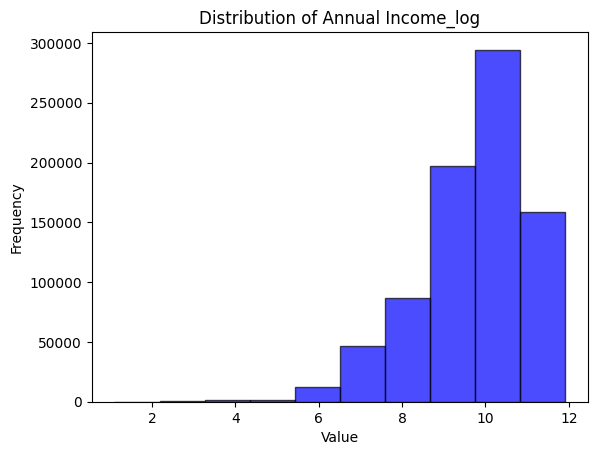

Annual Income_boxcox: Skewness = -0.07809575019574398


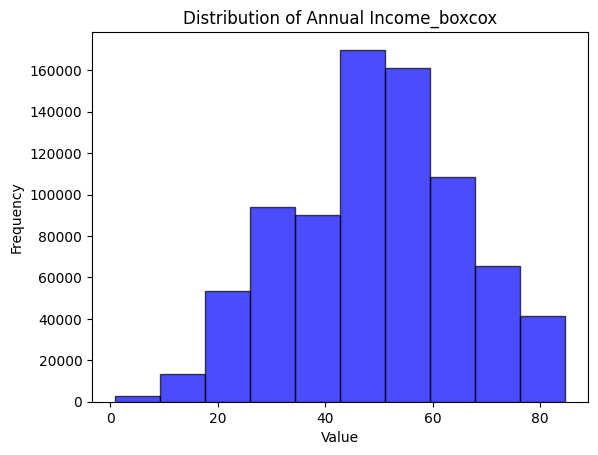

Annual Income_yeojohnson: Skewness = -0.07811355993192344


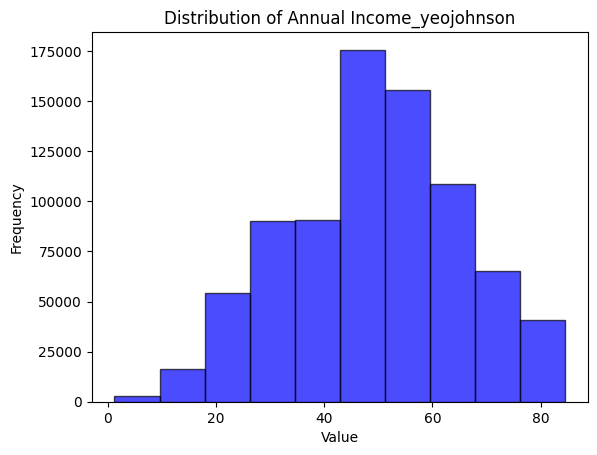

Initial Skewness of Health Score: 0.28724045790708064
After transformations for Health Score:
Health Score_sqrt: Skewness = -0.2315992603537051


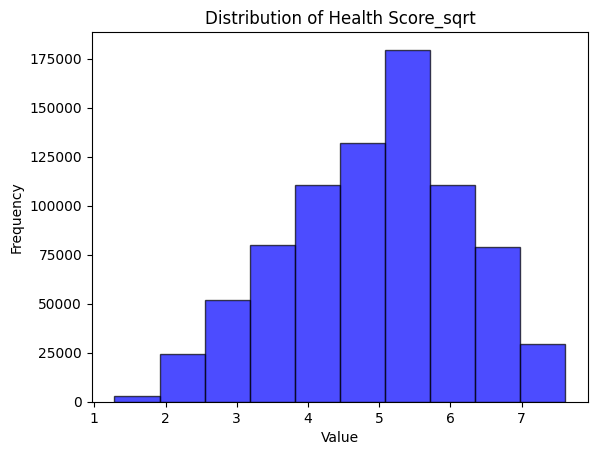

Health Score_cbrt: Skewness = -0.4321849574678091


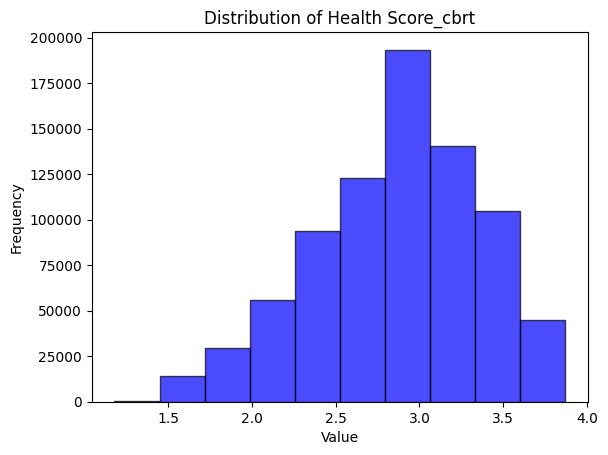

Health Score_log: Skewness = -0.7935178619253505


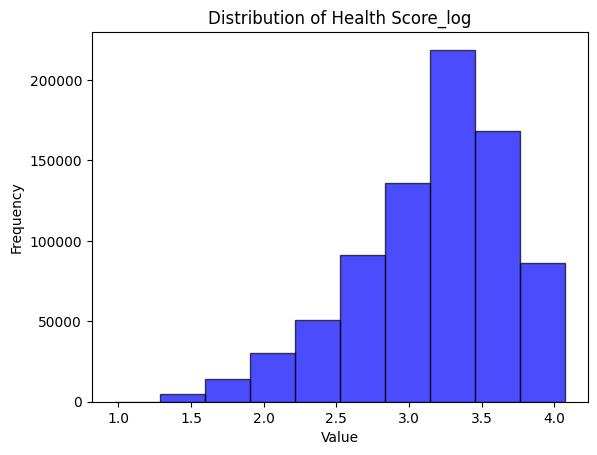

Health Score_boxcox: Skewness = -0.07950426343579217


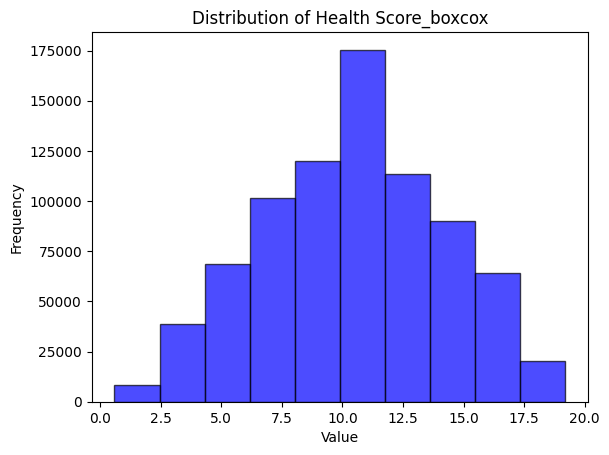

Health Score_yeojohnson: Skewness = -0.07289341146296979


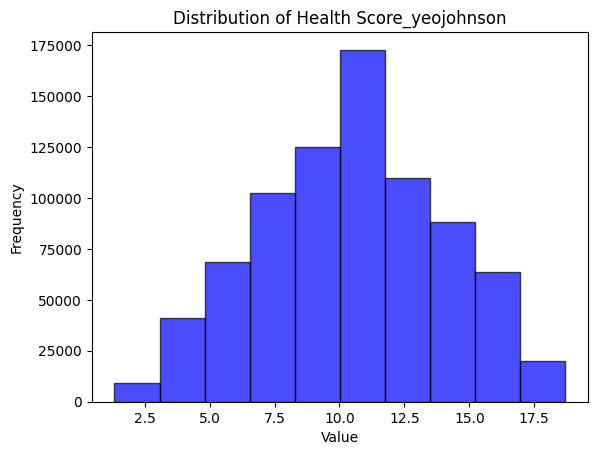

Tracked Lambda Values:
Annual Income_boxcox: lambda = 0.2645408462321088
Annual Income_yeojohnson: lambda = 0.2643626688488977
Health Score_boxcox: lambda = 0.6357165615304005
Health Score_yeojohnson: lambda = 0.6221031458007589
Premium Amount_boxcox: lambda = 0.402924772020389
Premium Amount_yeojohnson: lambda = 0.4015010123854762


In [187]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson
from scipy.stats import shapiro
import pandas as pd

# Dictionary to track lambda values for inverse transformations
lambda_dict = {}

# Function to visualize the distribution
def plot_hist(df, col):
    plt.hist(df[col], bins=10, color='blue', edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# Function to apply transformations
def apply_transformations(df, skewed_cols, lambda_dict=None, calculate_lambda=True):
    if lambda_dict is None:
        lambda_dict = {}

    for col in skewed_cols:
        if col in df.columns:
            transformations = {}
            # Check initial skewness
            print(f"Initial Skewness of {col}: {df[col].skew()}")

            # Apply square root transformation
            df[f'{col}_sqrt'] = np.sqrt(df[col])
            transformations[f'{col}_sqrt'] = df[f'{col}_sqrt'].skew()

            # Apply cube root transformation
            df[f'{col}_cbrt'] = np.cbrt(df[col])
            transformations[f'{col}_cbrt'] = df[f'{col}_cbrt'].skew()

            # Apply log transformation
            df[f'{col}_log'] = np.log1p(df[col])
            transformations[f'{col}_log'] = df[f'{col}_log'].skew()

            # Apply Box-Cox transformation (requires positive values)
            if (df[col] > 0).all():
                if calculate_lambda:
                    df[f'{col}_boxcox'], boxcox_lambda = boxcox(df[col] + 1e-6)
                    lambda_dict[f'{col}_boxcox'] = boxcox_lambda
                else:
                    df[f'{col}_boxcox'] = boxcox(df[col] + 1e-6, lmbda=lambda_dict[f'{col}_boxcox'])
                transformations[f'{col}_boxcox'] = pd.Series(df[f'{col}_boxcox']).skew()

            # Apply Yeo-Johnson transformation
            if calculate_lambda:
                df[f'{col}_yeojohnson'], yeojohnson_lambda = yeojohnson(df[col])
                lambda_dict[f'{col}_yeojohnson'] = yeojohnson_lambda
            else:
                df[f'{col}_yeojohnson'] = yeojohnson(df[col], lmbda=lambda_dict[f'{col}_yeojohnson'])
            transformations[f'{col}_yeojohnson'] = pd.Series(df[f'{col}_yeojohnson']).skew()

            # Plot transformed distributions
            print(f"After transformations for {col}:")
            for key, value in transformations.items():
                print(f"{key}: Skewness = {value}")
                plot_hist(df, key)

    return df, lambda_dict

# Apply transformations to the train dataset and calculate lambda values
print('Applying transformations to train set:')
train_df_cleaned, lambda_dict = apply_transformations(
    train_df_cleaned, skewed_cols, lambda_dict=lambda_dict, calculate_lambda=True
)

# Apply the same transformations to the test dataset using the lambda values from the train dataset
print('Applying transformations to test set:')
test_df_cleaned, _ = apply_transformations(
    test_df_cleaned, skewed_cols, lambda_dict=lambda_dict, calculate_lambda=False
)

# Display the tracked lambda values
print("Tracked Lambda Values:")
for key, value in lambda_dict.items():
    print(f"{key}: lambda = {value}")


Selecting yeo johnson transformation for all the three skewed columns

In [188]:
train_df_cleaned = train_df_cleaned.drop(columns=['Annual Income_sqrt', 'Annual Income_cbrt', 'Annual Income_log','Annual Income_boxcox', 'Health Score_sqrt',
                              'Health Score_cbrt', 'Health Score_log', 'Health Score_boxcox', 'Premium Amount_sqrt', 'Premium Amount_cbrt',
                              'Premium Amount_log', 'Premium Amount_boxcox','Annual Income','Health Score', 'Premium Amount'])

In [189]:
test_df_cleaned = test_df_cleaned.drop(columns=['Annual Income_sqrt', 'Annual Income_cbrt', 'Annual Income_log','Annual Income_boxcox', 'Health Score_sqrt',
                              'Health Score_cbrt', 'Health Score_log', 'Health Score_boxcox','Annual Income','Health Score'])

In [190]:
print(train_df_cleaned.columns)
print(test_df_cleaned.columns)

Index(['id', 'Age', 'Number of Dependents', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback_Average',
       'Customer Feedback_Good', 'Customer Feedback_Poor',
       'Occupation_Employed', 'Occupation_Self-Employed',
       'Occupation_Unemployed', 'Education Level_Bachelor's',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_PhD', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Property Type_Apartment', 'Property Type_Condo', 'Property Type_House',
       'Exercise Frequency_Daily', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
       'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female',
       'Gender_Male', 'Location_Rural', 'Location_Suburban', 'Location_Urban',
       'Annual Income_yeojohnson', 'Health Score_yeo

Correlation Matrix for Train DataFrame


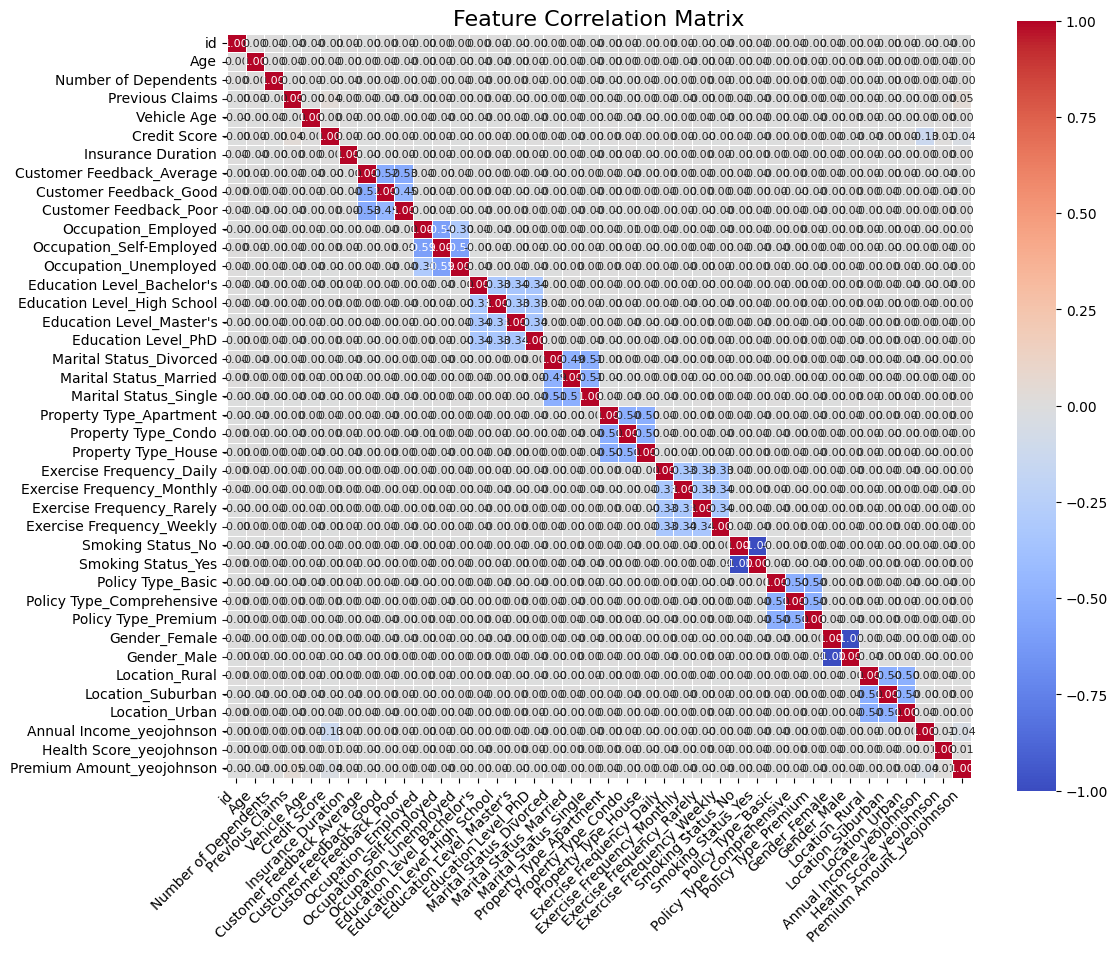

Correlation Matrix for Test DataFrame
Correlation matrix saved as test_correlation_matrix.png


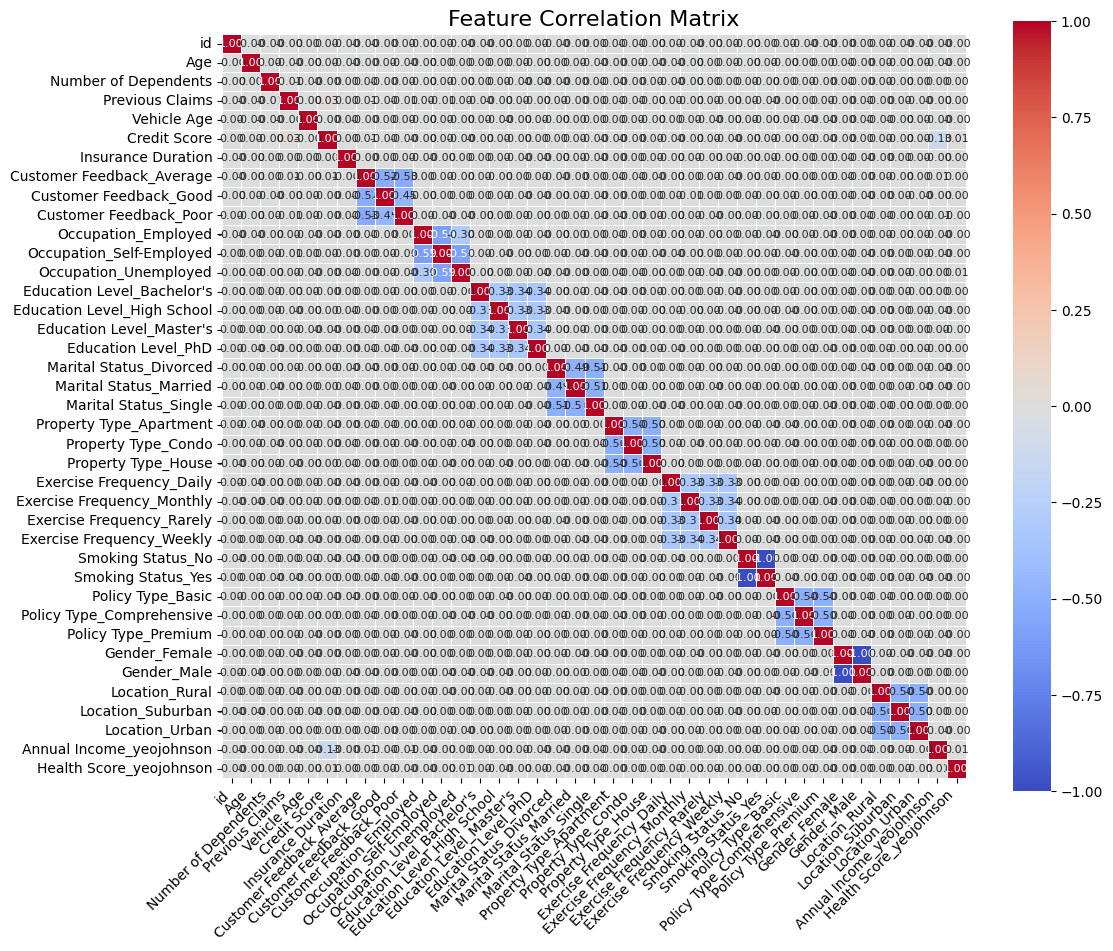

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(df, figsize=(10, 8), save_plot=False, filename="correlation_matrix.png"):
    """
    Plot the correlation matrix of a DataFrame.
    Parameters:
        df (pd.DataFrame): The DataFrame containing the features.
        figsize (tuple): Size of the heatmap figure.
        save_plot (bool): Whether to save the plot as a file.
        filename (str): Name of the file to save the plot if save_plot is True.
    """
    # Compute the correlation matrix
    correlation_matrix = df.corr()

    # Create the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(
        correlation_matrix,
        annot=True,
        fmt=".2f",
        cmap="coolwarm",
        cbar=True,
        square=True,
        linewidths=0.5,
        annot_kws={"size": 8}
    )
    plt.title("Feature Correlation Matrix", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    if save_plot:
        plt.savefig(filename, bbox_inches="tight")
        print(f"Correlation matrix saved as {filename}")
    else:
        plt.show()

# Example: Visualize correlation for train and test DataFrames
print("Correlation Matrix for Train DataFrame")
plot_correlation_matrix(train_df_cleaned, figsize=(12, 10))

print("Correlation Matrix for Test DataFrame")
plot_correlation_matrix(test_df_cleaned, figsize=(12, 10), save_plot=True, filename="test_correlation_matrix.png")


In [192]:
train_df_cleaned.columns

Index(['id', 'Age', 'Number of Dependents', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Customer Feedback_Average',
       'Customer Feedback_Good', 'Customer Feedback_Poor',
       'Occupation_Employed', 'Occupation_Self-Employed',
       'Occupation_Unemployed', 'Education Level_Bachelor's',
       'Education Level_High School', 'Education Level_Master's',
       'Education Level_PhD', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Property Type_Apartment', 'Property Type_Condo', 'Property Type_House',
       'Exercise Frequency_Daily', 'Exercise Frequency_Monthly',
       'Exercise Frequency_Rarely', 'Exercise Frequency_Weekly',
       'Smoking Status_No', 'Smoking Status_Yes', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium', 'Gender_Female',
       'Gender_Male', 'Location_Rural', 'Location_Suburban', 'Location_Urban',
       'Annual Income_yeojohnson', 'Health Score_yeo

In [193]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [194]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from tqdm import tqdm
def apply_advanced_regression_models(train_df, test_df, target_col, features):
    X_train = train_df[features]
    y_train = train_df[target_col]
    X_test = test_df[features]
    
    models = {
        'LightGBM': lgb.LGBMRegressor()
    }

    # Dictionary to store predictions and evaluation metrics
    predictions = {}
    results = {}

    # Apply each model and track progress using tqdm
    for model_name, model in tqdm(models.items(), desc="Training Models", total=len(models)):
        print(f"\nTraining {model_name}...")


        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        predictions[model_name] = y_pred

        if target_col in test_df.columns:
            y_test = test_df[target_col]
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            results[model_name] = {
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2 Score': r2
            }

            # Print the evaluation metrics
            print(f"{model_name} Results:")
            print(f"MAE: {mae:.4f}")
            print(f"MSE: {mse:.4f}")
            print(f"RMSE: {rmse:.4f}")
            print(f"R2 Score: {r2:.4f}")

    # If target column is missing in test_df, only return predictions
    if target_col not in test_df.columns:
        predictions_df = pd.DataFrame(predictions)
        print("\nPredictions for Test Data:")
        print(predictions_df.head())
        return predictions_df
    else:
        # Convert results into a DataFrame for better visualization
        if results:
            results_df = pd.DataFrame(results).T
            return results_df
        else:
            return None


In [221]:
# Define your features and target column (replace with your actual column names)
target_col = 'Premium Amount_yeojohnson'  # Replace with the actual target column
features = [col for col in train_df_cleaned.columns if col != target_col]  # Exclude target column from features

# Apply advanced regression models
predictions_df = apply_advanced_regression_models(train_df_cleaned, test_df_cleaned, target_col, features)

# Display predictions for test data
if predictions_df is not None:
    print("\nPredictions for Test Data:")
    print(predictions_df)


Training Models:   0%|          | 0/1 [00:00<?, ?it/s]


Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 581884, number of used features: 39
[LightGBM] [Info] Start training from score 35.812772


Training Models: 100%|██████████| 1/1 [00:05<00:00,  5.05s/it]


Predictions for Test Data:
    LightGBM
0  38.328831
1  36.545387
2  36.281740
3  36.429359
4  35.243926

Predictions for Test Data:
         LightGBM
0       38.328831
1       36.545387
2       36.281740
3       36.429359
4       35.243926
...           ...
799995  38.647537
799996  37.502625
799997  36.136959
799998  36.828120
799999  36.083542

[800000 rows x 1 columns]


In [222]:
train_df_cleaned['Premium Amount_yeojohnson'].describe()

count    581884.000000
mean         35.812772
std          13.638905
min           5.965751
25%          28.161133
50%          35.451289
75%          44.746644
max          73.609195
Name: Premium Amount_yeojohnson, dtype: float64

In [223]:
predictions_df.describe()

,LightGBM
count,800000.000000
mean,35.651792
std,3.026572
min,19.804709
25%,35.718644
50%,36.154102
75%,36.777910
max,47.157145


In [224]:
train_df['Premium Amount'].describe()

count    1.200000e+06
mean     1.102545e+03
std      8.649989e+02
min      2.000000e+01
25%      5.140000e+02
50%      8.720000e+02
75%      1.509000e+03
max      4.999000e+03
Name: Premium Amount, dtype: float64

In [225]:
predictions_df.describe()

,LightGBM
count,800000.000000
mean,35.651792
std,3.026572
min,19.804709
25%,35.718644
50%,36.154102
75%,36.777910
max,47.157145


In [226]:
import numpy as np

# Yeo-Johnson inverse transformation
def yeojohnson_inverse(y_transformed, lmbda):
    y_original = np.zeros_like(y_transformed)
    
    # For y >= 0
    pos_idx = y_transformed >= 0
    if lmbda == 0:
        y_original[pos_idx] = np.exp(y_transformed[pos_idx]) - 1
    else:
        y_original[pos_idx] = (y_transformed[pos_idx] * lmbda + 1)**(1 / lmbda) - 1
    
    # For y < 0
    neg_idx = ~pos_idx
    if lmbda == 2:
        y_original[neg_idx] = 1 - np.exp(-y_transformed[neg_idx])
    else:
        y_original[neg_idx] = 1 - ((-y_transformed[neg_idx] * (2 - lmbda) + 1)**(1 / (2 - lmbda)))
    
    return y_original

# Inverse-transform the 'premium_amount' column for all models
def inverse_transform_premium_amount(predictions, lambda_value):
    for model in predictions.columns:
        predictions[model] = yeojohnson_inverse(predictions[model].values, lambda_value)
    return predictions

# Example usage
# Retrieve the lambda value for the 'premium_amount' column
lambda_value = lambda_dict["Premium Amount_yeojohnson"]  # Ensure this is correct and set during preprocessing

# Inverse-transform the predictions
predictions = inverse_transform_premium_amount(predictions_df, lambda_value)

# Display the inverse-transformed predictions
print(predictions.head())


      LightGBM
0  1058.336343
1   946.787153
2   930.923936
3   939.786186
4   870.029443


In [227]:
train_df['Premium Amount'].describe()

count    1.200000e+06
mean     1.102545e+03
std      8.649989e+02
min      2.000000e+01
25%      5.140000e+02
50%      8.720000e+02
75%      1.509000e+03
max      4.999000e+03
Name: Premium Amount, dtype: float64

In [228]:
predictions_df.describe()

,LightGBM
count,800000.000000
mean,903.731120
std,149.982646
min,233.885533
25%,897.578308
50%,923.301652
75%,960.910921
max,1724.124090


In [233]:
test_df.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration
count,8.000000e+05,800000.000000,800000.000000,557198.000000,799997.000000,800000.000000,799998.000000
mean,1.600000e+06,41.136399,2.009707,1.004873,9.571891,593.039273,5.018949
std,2.309403e+05,13.431742,1.349006,0.982803,5.772200,141.276363,2.593759
min,1.200000e+06,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000
25%,1.400000e+06,30.000000,1.000000,0.000000,5.000000,483.000000,3.000000
50%,1.600000e+06,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000
75%,1.799999e+06,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000
max,1.999999e+06,64.000000,4.000000,9.000000,19.000000,849.000000,9.000000


In [230]:
test_df_cleaned.describe()

,id,Age,Number of Dependents,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback_Average,Customer Feedback_Good,Customer Feedback_Poor,...,Policy Type_Basic,Policy Type_Comprehensive,Policy Type_Premium,Gender_Female,Gender_Male,Location_Rural,Location_Suburban,Location_Urban,Annual Income_yeojohnson,Health Score_yeojohnson
count,8.000000e+05,800000.000000,800000.000000,557198.000000,799997.000000,800000.000000,799998.000000,800000.000000,800000.000000,800000.000000,...,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,1.600000e+06,41.136399,2.008484,1.004873,9.571891,593.039273,5.018949,0.379366,0.307591,0.313043,...,0.332686,0.332778,0.334536,0.498639,0.501361,0.333900,0.333987,0.332112,49.062295,10.466161
std,2.309403e+05,13.431742,1.349009,0.982803,5.772200,141.276363,2.593759,0.485230,0.461497,0.463732,...,0.471176,0.471208,0.471828,0.499998,0.499998,0.471605,0.471636,0.470971,16.156612,3.506580
min,1.200000e+06,18.000000,0.000000,0.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.274783,1.337577
25%,1.400000e+06,30.000000,1.000000,0.000000,5.000000,483.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.820797,7.949417
50%,1.600000e+06,41.133822,2.000000,1.000000,10.000000,594.081544,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,49.588737,10.811156
75%,1.799999e+06,53.000000,3.000000,2.000000,15.000000,706.000000,7.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.074899,13.011583
max,1.999999e+06,64.000000,4.000000,9.000000,19.000000,849.000000,9.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,84.558588,18.697168


In [231]:
predictions_df.columns

Index(['LightGBM'], dtype='object')

In [232]:
predictions_df['id'] = test_df['id']
predictions_df.columns

Index(['LightGBM', 'id'], dtype='object')

In [234]:
predictions_df = predictions_df.rename(columns={'LightGBM': 'Premium Amount'})

In [235]:
predictions_df.describe()

,Premium Amount,id
count,800000.000000,8.000000e+05
mean,903.731120,1.600000e+06
std,149.982646,2.309403e+05
min,233.885533,1.200000e+06
25%,897.578308,1.400000e+06
50%,923.301652,1.600000e+06
75%,960.910921,1.799999e+06
max,1724.124090,1.999999e+06


In [237]:
predictions_df = predictions_df.reindex(columns=['id', 'Premium Amount'])

In [240]:
predictions_df.to_csv('submission.csv', index=False)